In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')


In [8]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [3]:
df1.describe()

,x
count,200.000000
mean,6.511559
std,2.180756
min,0.556924
25%,4.895169
50%,6.507704
75%,8.261932
max,12.958625


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


### 2. For df1:

- Take a look at the data in df1.
- Does x increase from time one to time two?
- Visualize the relationship between x and time.
- Run a statistical test to further examine the relationship between these features.


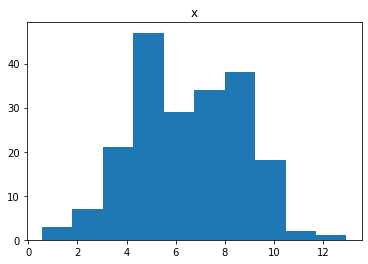

In [12]:
for col in df1.columns:
    if df1[col].dtype != object:
        plt.hist(df1[col])
        plt.title(col)
        plt.show()

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

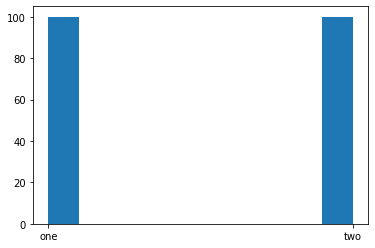

In [14]:
plt.hist(df1.time)

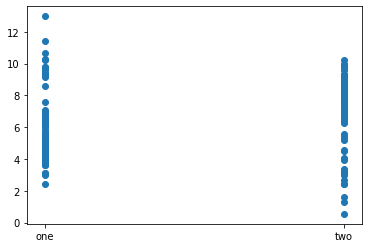

In [26]:
# One seems to have a higher concentration of numbers than 2
plt.scatter(x='time',y='x', data= df1)

In [32]:
t,p = stats.ttest_ind(df1.x,df1.time)
print(t,p/2)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [33]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   group   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [36]:
df2.describe()

,x,y
count,200.000000,200.000000
mean,99.980573,606.099784
std,7.753863,26.958585
min,84.542520,542.096437
25%,93.056095,586.579382
50%,100.095115,599.022923
75%,107.320842,629.098231
max,114.606179,665.250458


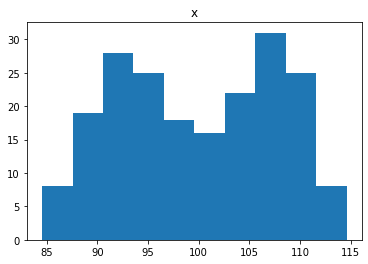

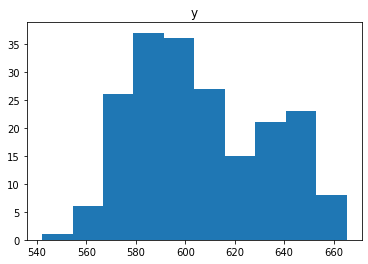

In [38]:
for col in df2.columns:
    if df2[col].dtype != object:
        plt.hist(df2[col])
        plt.title(col)
        plt.show()

(array([50.,  0.,  0., 50.,  0.,  0., 50.,  0.,  0., 50.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

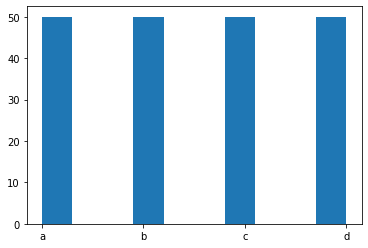

In [39]:
plt.hist(df2.group)

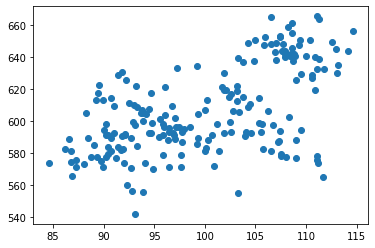

In [42]:
plt.scatter(x='x',y='y', data= df2)
# Looks like as x increases

In [44]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [43]:
df3.groupby(['surgeon']).mean()

,success
surgeon,
A,0.877083
B,0.723077


In [45]:
df3.groupby(['surgeon','surgery']).size()

surgeon  surgery     
A        appendectomy    381
         heart bypass     99
B        appendectomy    102
         heart bypass    418
dtype: int64

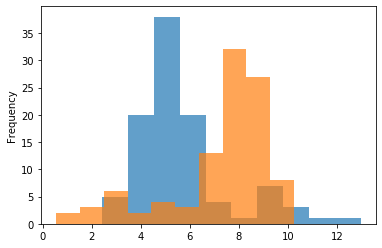

In [51]:
ax=df1[df1.time=='one'].x.plot.hist(label='time=one', alpha =.7)
ax=df1[df1.time=='two'].x.plot.hist(label='time=two', alpha =.7)

In [48]:
df1.groupby(['group','time']).x.mean()

group  time
a      one      5.084092
       two      2.936197
b      one     10.026997
       two      8.065904
Name: x, dtype: float64

In [50]:
df1.groupby('group').x.mean()

group
a    4.768225
b    8.326049
Name: x, dtype: float64

In [49]:
df1.groupby(['group','time']).size()

group  time
a      one     87
       two     15
b      one     13
       two     85
dtype: int64